# Analyze TF-iDFs to find the gap

See online at https://mica5.github.io/Investigate+the+Gap.html

In [7]:
import os
from contextlib import contextmanager

from IPython.display import display
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/Users/mica/anaconda3/envs/cs157/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/mica/anaconda3/envs/cs157/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
@contextmanager
def temporary_unlimited_row_limit():
    max_rows = pd.options.display.max_rows
    pd.options.display.max_rows = -1
    yield
    pd.options.display.max_rows = max_rows

# Gap Visualizations

In [8]:
from parallel_tokenizer import run_tokenize, content_generators

In [19]:
content_generators[2][0]

"3 simple documents: ['the cat sang', 'the dog sang', 'the the the']"

In [50]:
sparsematrix.data

array([0.42544054, 0.54783215, 0.72033345])

In [32]:
[a for a in dir(sparsematrix) if 'matrix' in a]

['_cs_matrix__get_has_canonical_format',
 '_cs_matrix__get_sorted',
 '_cs_matrix__set_has_canonical_format',
 '_cs_matrix__set_sorted',
 '_get_submatrix',
 '_mul_sparse_matrix']

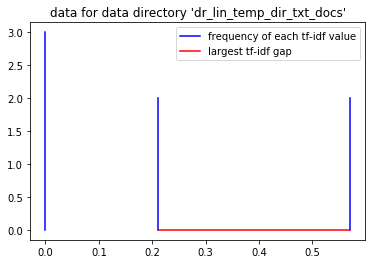

gap left: 0.21
gap right: 0.57
Gap width: 0.36
found keywords:
cat, sang, dog, sang, 

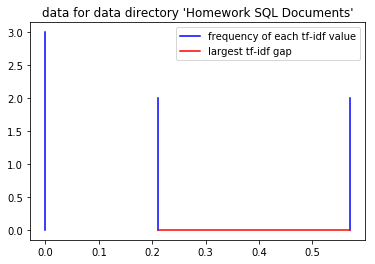

gap left: 0.21
gap right: 0.57
Gap width: 0.36
found keywords:
dog, sang, cat, sang, 

In [9]:
data_dirs = [
    "./documents/dr_lin_temp_dir_txt_docs",
    "./documents/Homework SQL Documents",
]
all_results = list()
for data_dir in data_dirs:
    directory = os.path.basename(data_dir)
    results = run_tokenize([data_dir], do_print=False, content_generator=content_generators[2][1]())
    all_results.append(results)
    # documentid, word, tfidf

    tfidfs = pd.Series([v[-1] for v in results]).sort_values()

    unique_tfidfs = pd.Series(tfidfs.unique())

    tfidf_gap_index = unique_tfidfs.diff().idxmax()-1
    tfidf_gap_left = unique_tfidfs[tfidf_gap_index]
    tfidf_gap_right = unique_tfidfs[tfidf_gap_index+1]
    tfidf_gap = tfidf_gap_right - tfidf_gap_left

    plt.title("data for data directory '{}'".format(directory))

    tfidfvcs = tfidfs.value_counts()
    maxcount = 0
    label = 'frequency of each tf-idf value'
    for tfidf, count in tfidfvcs.iteritems():
        maxcount = max(maxcount, count)
        plt.plot([tfidf, tfidf], [0, count], 'b', label=label)
        label = None

    offset = .1
    plt.plot([tfidf_gap_left, tfidf_gap_right], [0, 0], '-r', label='largest tf-idf gap')
    plt.legend()
    plt.show()

    print('gap left: {:.2f}'.format(tfidf_gap_left))
    print('gap right: {:.2f}'.format(tfidf_gap_right))
    print("Gap width: {:.2f}".format(tfidf_gap))

    print("found keywords:")
    for r in results:
        if r[-1] >= tfidf_gap_left:
            print(r[1], end=', ')

# TF-iDF Tables

In [13]:
all_results[0]

[(0, 'the', 0),
 (0, 'cat', 0.21030991785715245),
 (0, 'sang', 0.5698370971171516),
 (1, 'the', 0),
 (1, 'dog', 0.21030991785715245),
 (1, 'sang', 0.5698370971171516),
 (2, 'the', 0)]

In [14]:
df1 = pd.DataFrame(
    all_results[0],
    columns='docid word tfidf'.split()
)

In [15]:
df1.sort_values('tfidf')

,docid,word,tfidf
0,0,the,0.000000
3,1,the,0.000000
6,2,the,0.000000
1,0,cat,0.210310
4,1,dog,0.210310
2,0,sang,0.569837
5,1,sang,0.569837


In [16]:
df2 = pd.DataFrame(
    all_results[1],
    columns='word docid tfidf'.split()
)

In [18]:
df2.sort_values('tfidf', ascending=False)

,word,docid,tfidf
2,1,sang,0.569837
5,0,sang,0.569837
1,1,dog,0.210310
4,0,cat,0.210310
0,1,the,0.000000
3,0,the,0.000000
6,2,the,0.000000


team 2  


